### 折线图

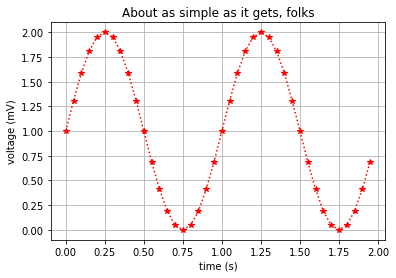

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 

t = np.arange(0.0, 2.0, 0.05)
s = 1 + np.sin(2*np.pi*t)

# plt.plot(t,s) --- > 换做如下：
line, = plt.gca().plot(t, s)
line.set_marker('*')
line.set_linestyle(':')
line.set_color('r')

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


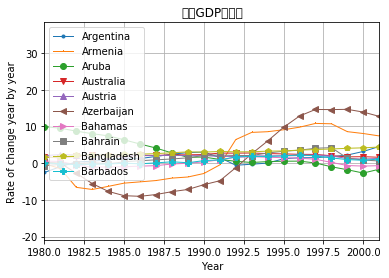

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# the complete plot case
    
def set_ch(): 
#  "在plot图中显示中文"
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['STFangSong'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    return

set_ch() # 显示中文在plot中

#数据源是一份包含全球所有国家有数据统计以来的GDP变化率，到2002年为止
dataReal = r"./world_history_gdp_data.csv"

# Read CSV (comma-separated) file into DataFrame
pdata = pd.read_csv(dataReal,sep=",") 
#print(pdata.to_string())
# intro to dataframe: http://pandas.pydata.org/pandas-docs/stable/dsintro.html 
''' indexing for dataframe
Operation                        Syntax        Result
Select column                    df[col]       Series
Select row by label              df.loc[label] Series
Select row by integer location   df.iloc[loc]  Series
Slice rows                       df[5:10]      DataFrame
Select rows by boolean vector    df[bool_vec]  DataFrame
'''

indexs = pdata.keys().values # 属性的名称列表, column
#print(indexs)

#设定开始统计GDP的年份，最早从1840年开始
startYear = "1980"
from_ = 0
for i,year in enumerate(indexs):
    if year == startYear:
        from_ = i
        break;

x_pos = indexs[from_:]
for i in range(len(x_pos)):
    x_pos[i] = int(x_pos[i])


#创建坐标轴 
fig, ax = plt.subplots()

#1.显示整个窗口的标题 
fig.canvas.set_window_title('GDP countries')

#2.显示当前图表的x，y轴标注
ax.set_xlabel("Year")
ax.set_ylabel("Rate of change year by year")

#3.显示坐标轴的网格 
ax.grid()

# set title of the figure 
ax.set_title(u'各国GDP增长率')

#从数据源中的那个国家的开始点和结束点开始统计
startCountry,endCountry= 10,20

#4.标注所有线的标记类型，方便不便区分颜色的人阅读 
markerSymbols = ['.', ',', 'o', 'v', '^', '<', '>', 's', 'p', 'P']

#5.设置x轴的大小范围 
ax.set_xlim(min(x_pos), max(x_pos))

#6.目前颜色自动分配

minY,maxY=0,0
linesets=[]
countries=[]

#print(list(enumerate(pdata.iloc[100].values)) )

for i,gdps in enumerate(pdata.iloc[startCountry:endCountry].values):
    #print(i,gdps)
    line, = ax.plot([], [], lw=1) # 感觉最常用 plt.plot
    linesets.append(line)
    countries.append(gdps[0]) # gdps[0]是国家的名字 
    #set_marker 
    line.set_marker(markerSymbols[i])
    #set_data
    line.set_data(x_pos[0:], gdps[from_:]) 
    
    #计算GDP变化率中的最小值
    minY = min(min(gdps[from_:]), minY)
    
    #计算GDP变化率中的最大值
    maxY = max(max(gdps[from_:]), maxY)

#7.显示每种线的缩略图标记 
plt.legend(linesets, countries, loc='upper left') 

#8.更改GDP变化率中的最小最大值范围
delta = maxY - minY
minY = minY - delta / 2
maxY = maxY + delta

# set_ylim --- 没有这个会很有问题  
ax.set_ylim(minY, maxY)

plt.show()

In [7]:
import matplotlib
matplotlib.font_manager.FontProperties().get_family()

['sans-serif']